In [1]:
import os

In [2]:
os.chdir('..')
os.listdir()

['loggers',
 '.DS_Store',
 'original_data',
 'requirements.txt',
 'models',
 'processed_data',
 'trainers',
 'README.md',
 'saved_models',
 '.gitignore',
 'data_processor',
 'data_loader',
 'main.py',
 'jupyter']

In [3]:
from data_processor.utils import load_numpy_arrays, numpy_to_tensor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier

In [4]:
#Gaussian naive bayes
nb = GaussianNB()

In [98]:
#Linear classifiers with SGD training
sgd = SGDClassifier(max_iter=1000, random_state=0,loss = 'hinge')

In [32]:
#MLP classifier
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1500), random_state=1)

In [50]:
#KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

In [93]:
#Decision tree classifier
tree = DecisionTreeClassifier()

In [55]:
#random forest classifier
random_forest = RandomForestClassifier(n_estimators=1500, max_depth=10)

In [76]:
#linear svm
linear_svm = SVC(kernel='linear', probability=True)

In [77]:
#poly svm
poly_svm = SVC(kernel='poly', probability=True)

In [78]:
#rbf svm
rbf_svm = SVC(kernel='rbf', probability=True)

In [79]:
"""
    a function modified from 
        https://www.kaggle.com/code/andradaolteanu/work-w-audio-data-visualise-classify-recommend
"""
def run_model(model, dataset, model_name):
    print(model_name)
    X_train, y_train,  X_val, y_val = dataset
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    print('training accuracy: %.2f%%'% (accuracy_score(y_train, train_pred) * 100))
    print('validation accuracy: %.2f%%' % (accuracy_score(y_val, val_pred) * 100))
    confusion_matr = confusion_matrix(y_train, train_pred)
    plt.figure(figsize = (16, 9))
    sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
    xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
    yticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
    plt.title('heatmap for '+ model_name)
    plt.show()

In [80]:
def print_accuracy(model, X, y, txt='test'):
    pred = model.predict(X)
    print('%s accuracy: %.2f%%' % (txt, accuracy_score(y, pred) * 100))

In [81]:
data_train, data_val, data_test = load_numpy_arrays(['data_train.npy', 'data_val.npy', 'data_test.npy'], 
                                                    path_prefix='processed_data/processed_features/10-genres/')

In [82]:
X_train, y_train = data_train[:, :-1], data_train[:, -1]
X_val, y_val = data_val[:, :-1], data_val[:, -1]
X_test, y_test = data_test[:, :-1], data_test[:, -1]

Gaussion nb
training accuracy: 58.00%
validation accuracy: 57.00%


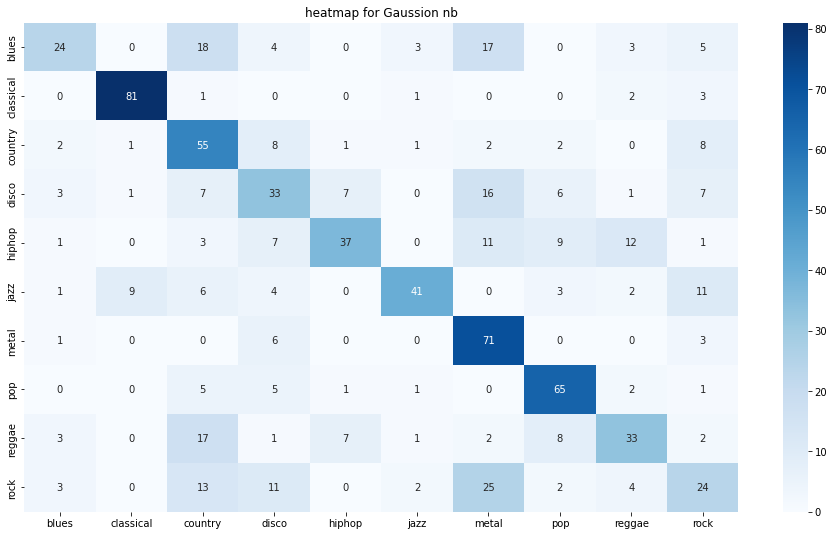

Stochastic Gradient Descent
training accuracy: 78.50%
validation accuracy: 72.00%


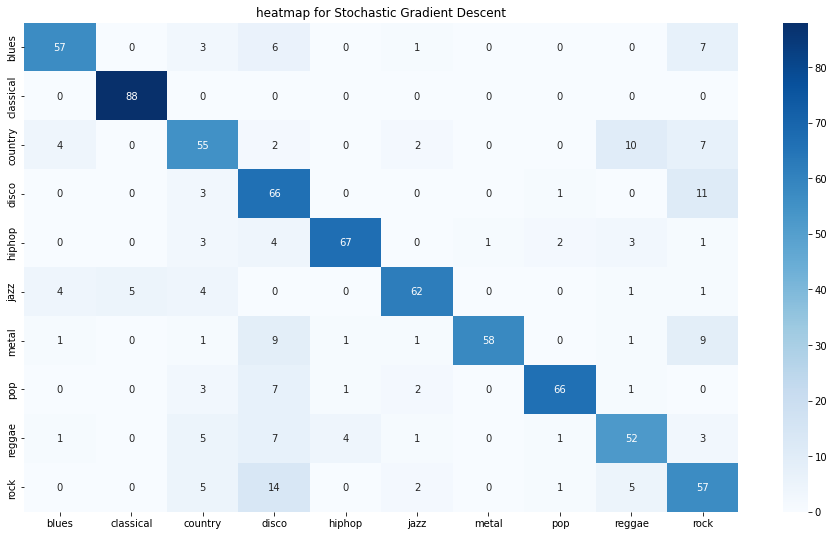

MLP
training accuracy: 99.88%
validation accuracy: 78.00%


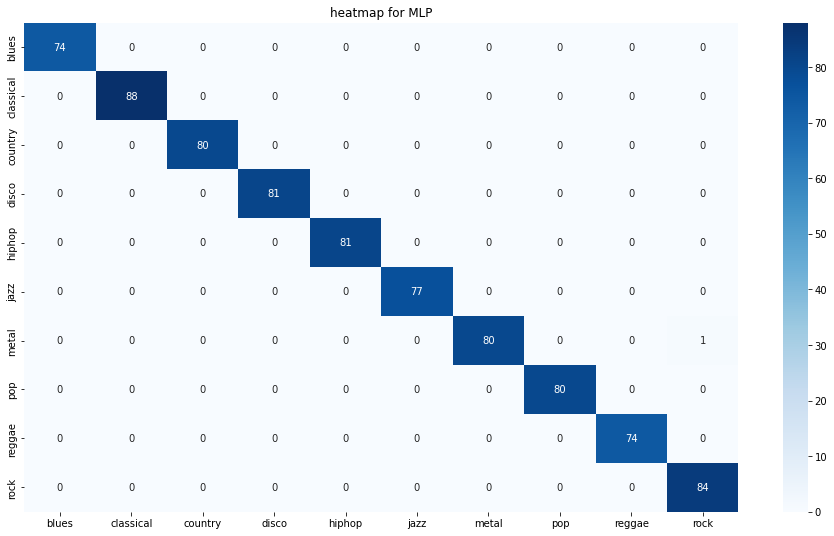

KNN
training accuracy: 80.75%
validation accuracy: 78.00%


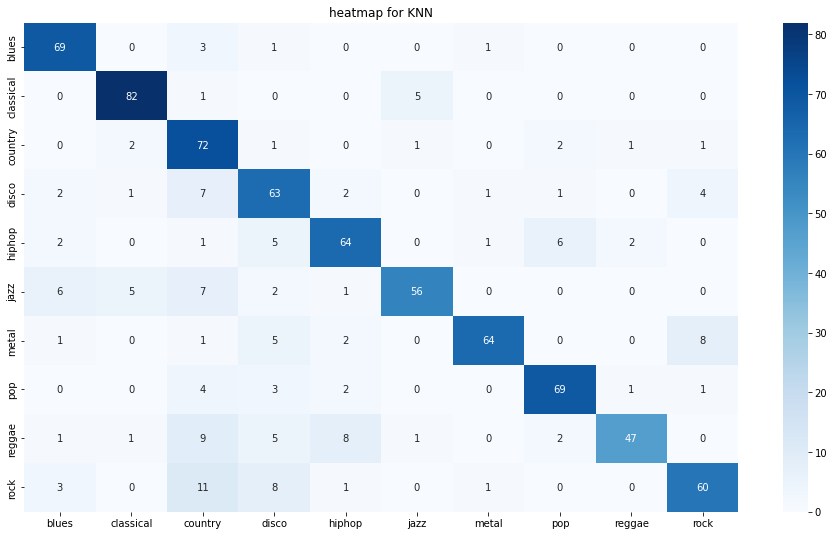

Decission Trees
training accuracy: 99.88%
validation accuracy: 59.00%


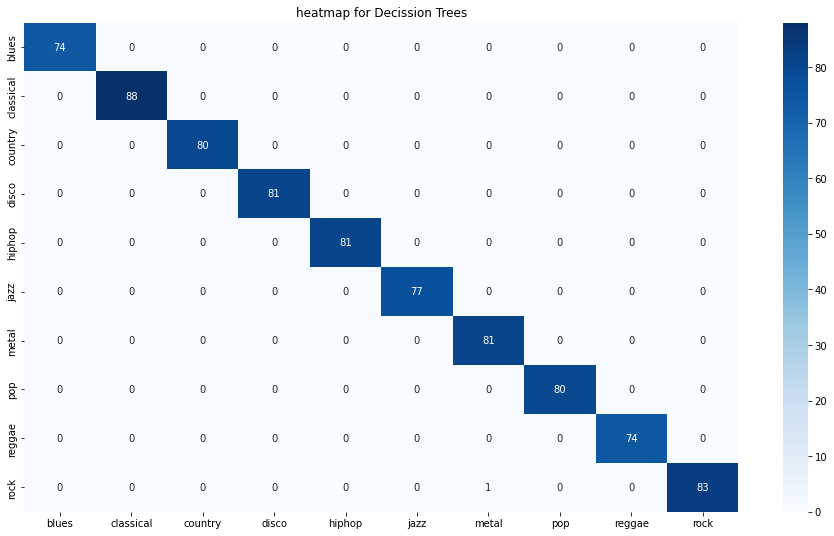

Random Forest
training accuracy: 99.88%
validation accuracy: 76.00%


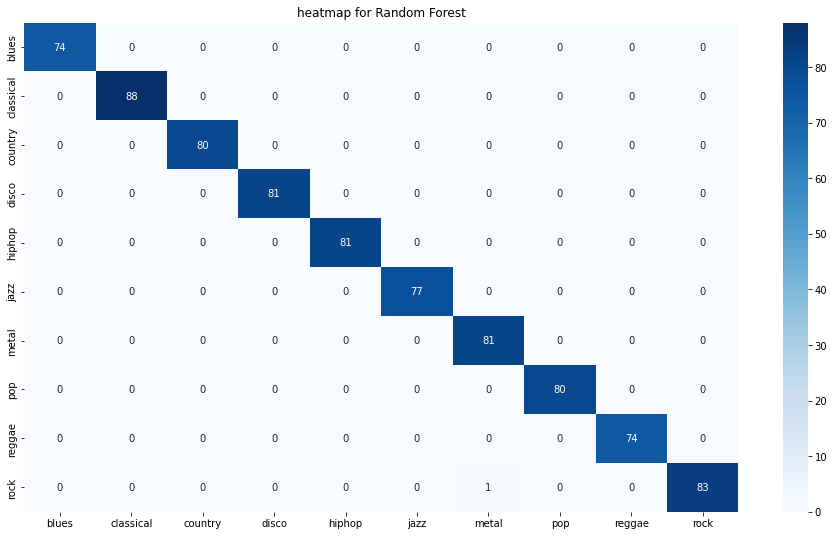

Linear SVM
training accuracy: 97.62%
validation accuracy: 72.00%


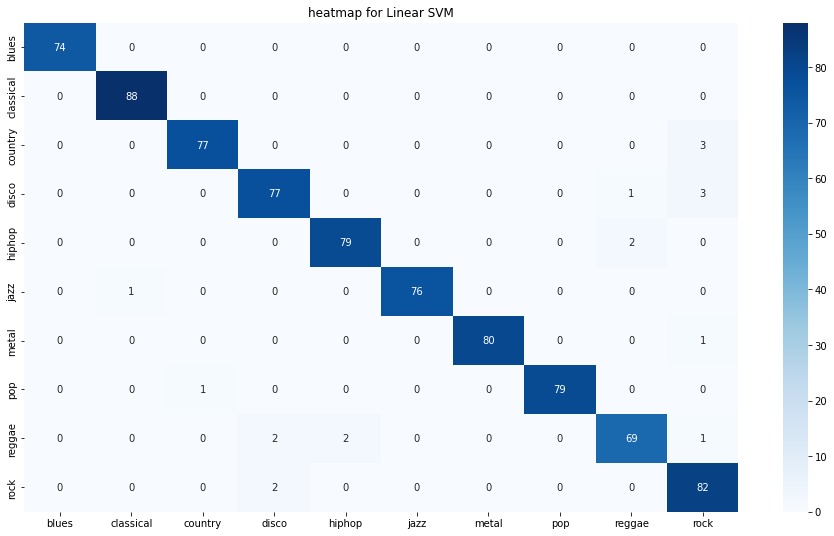

Polunomial SVM
training accuracy: 78.00%
validation accuracy: 64.00%


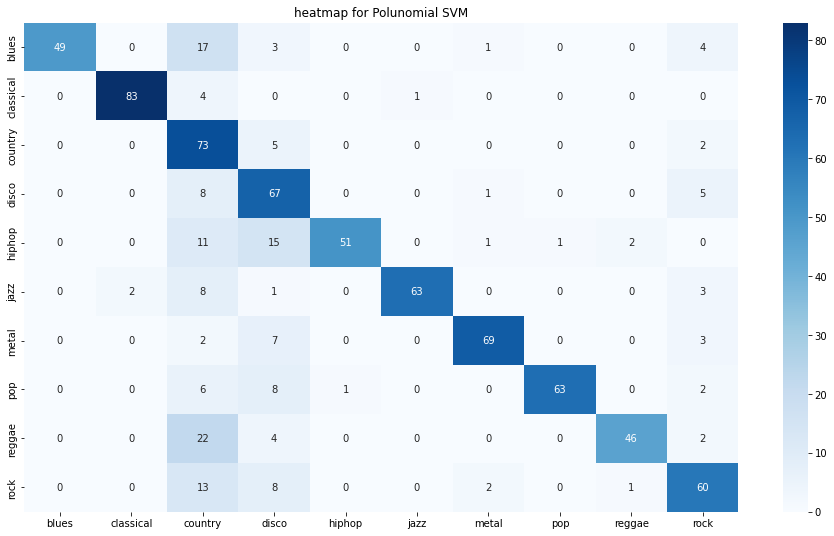

rbf SVM
training accuracy: 88.88%
validation accuracy: 76.00%


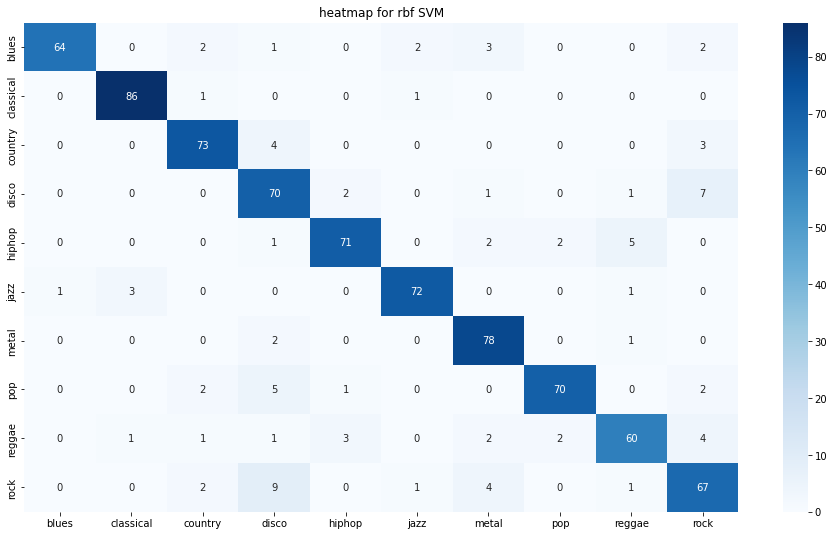

In [99]:
dictionary = {'Gaussion nb': nb, 'Stochastic Gradient Descent':sgd, 'MLP':nn, 
              'KNN':knn, 'Decission Trees':tree, 'Random Forest':random_forest, 
              'Linear SVM':linear_svm, 'Polunomial SVM':poly_svm, 'rbf SVM': rbf_svm}
for key, value in dictionary.items():
    run_model(value, (X_train, y_train, X_val, y_val), key)

Hard Voting
training accuracy: 98.75%
validation accuracy: 82.00%


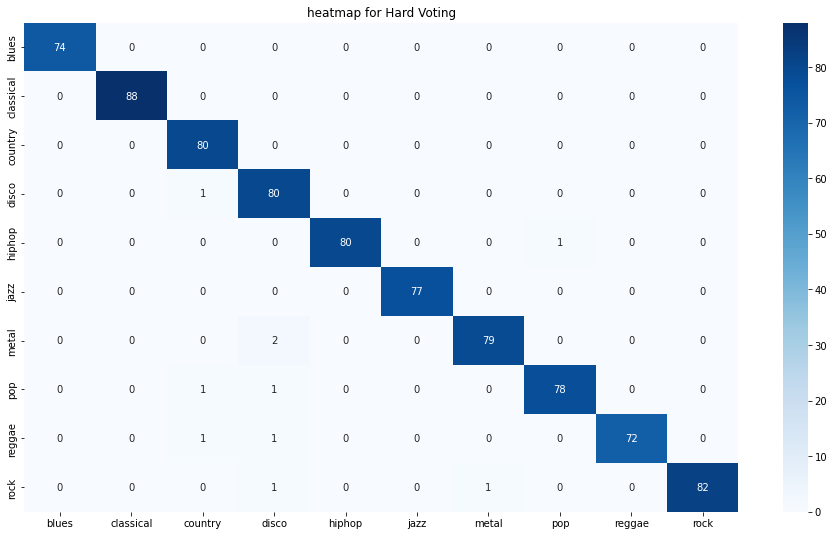

In [104]:
eclf1 = VotingClassifier(estimators=[
    ('nb', nb), 
    ('sgd', sgd),
    ('nn', nn),
    ('knn', knn), 
    ('tree', tree),
    ('random_forest', random_forest),
    ('linear_svm', linear_svm),
    ('poly_svm', poly_svm),
    ('rbf_svm', rbf_svm)], voting='hard')
run_model(eclf1, (X_train, y_train, X_val, y_val), "Hard Voting")

Soft Voting
training accuracy: 99.88%
validation accuracy: 86.00%


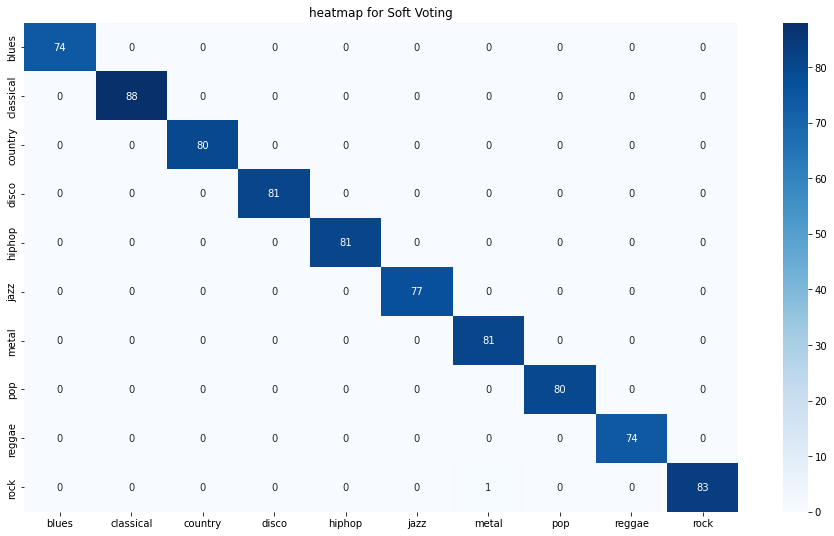

In [105]:
eclf2 = VotingClassifier(estimators=[
    ('nb', nb), 
    ('nn', nn),
    ('knn', knn), 
    ('tree', tree),
    ('random_forest', random_forest),
    ('linear_svm', linear_svm),
    ('poly_svm', poly_svm),
    ('rbf_svm', rbf_svm)], voting='soft')
run_model(eclf2, (X_train, y_train, X_val, y_val), "Soft Voting")

In [108]:
best_model_name='soft_voting'
print('best model: %s'% (best_model_name))
print_accuracy(eclf2, X_test, y_test, txt='testing')

best model: soft_voting
testing accuracy: 75.00%
